# Notebook Objective<a id='Notebook Objective'></a>

In this notebook we'll be exporing various modeling approaches based on insights from the EDA notebook.

The goal is to try a couple of different models to gain a baseline understanding of modeling requirements and performance for those models.
The insights we gain here will inform the final modeling step. 

The models we'll be working with are K-means clustering and Random Forest Regression. 
There are multiple levels in our data (Country, Region and Global) so we'll applying our chosen models different levels to 
learn more about how the data might differ by level.

# Module Imports<a id='Module Imports'></a>

In [1]:
#import modules

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error





In [3]:
#import cleaned_data for modeling
df_global = pd.read_csv('../data/interim/cleaned_data.csv', index_col = 0)

In [4]:
df_global.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


# Model_1 - Random Forest model for global data<a id='Model_1 Random Forest model for global data'></a>


Model_1 will use of all of the feature columns in the data set, including the ID columns.

Columns as follows:

'Country Name'
'Regional Indicator' 
'Year' 
'Log GDP Per Capita' 
'Social Support'
'Healthy Life Expectancy At Birth' 
'Freedom To Make Life Choices'
'Generosity' 
'Perceptions Of Corruption' 
'Positive Affect’ 
'Negative Affect' 
'Confidence In National Government'

The target column is 'Life Ladder’

In [7]:
#Convert object type columns to numeric using encoding

country_label_encoder = LabelEncoder()
df_global['Country Name'] = country_label_encoder.fit_transform(df_global['Country Name'])

region_label_encoder = LabelEncoder()
df_global['Regional Indicator'] = region_label_encoder.fit_transform(df_global['Regional Indicator'])

In [8]:
df_global.head()


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,0,6,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,0,6,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,0,6,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,0,6,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,0,6,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [6]:
#Define X and y prior to splitting

target_col = ['Life Ladder']
X = df_global.drop(target_col, axis = 1)
y = df_global[target_col]

In [7]:
#Train Test split global data - using test_size = 0.2 and random_state = 42 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [8]:
#Instantiate and Fit the model - using all default parameters - out of the box
global_RF = RandomForestRegressor()
global_RF_model = global_RF.fit(X_train,y_train.values.ravel())

y_pred_model_1 = global_RF_model.predict(X_test)

## Model_1 - Performance <a id='Model_1 Performance'></a>

In [9]:
#compute r2 score for global model
model_1_r2_score_global = r2_score(y_test,y_pred_model_1)
print(f"The r2 score for the global model is: {model_1_r2_score_global}")

The r2 score for the global model is: 0.8947686488482727


In [10]:
model_1_mape = mean_absolute_percentage_error(y_test,y_pred_model_1)
print(f"The MAPE score for the global model is: {model_1_mape}")

The MAPE score for the global model is: 0.057415516414224044


In [11]:
#Reset the index on the test data
y_test_reset = y_test.reset_index(drop = True)

#Make the y_pred array a dataframe and reset the index
y_pred_model_1_df = pd.DataFrame(y_pred_model_1, columns = ['y_pred'])
y_pred_model_1_df_reset = y_pred_model_1_df.reset_index(drop = True)

#Conact the y_test and y_pred data into a single dataframe
residuals_df_model_1 = pd.concat([y_pred_model_1_df_reset,y_test_reset],axis = 1)

#Calculate the residuals for each value in the test set. 
residuals_df_model_1['Residuals'] = residuals_df_model_1['Life Ladder'] - residuals_df_model_1['y_pred']
residuals_df_model_1.head()


,y_pred,Life Ladder,Residuals
0,5.724256,5.597723,-0.126533
1,6.308931,6.290690,-0.018240
2,5.977279,4.741295,-1.235984
3,7.257752,6.830125,-0.427627
4,7.152089,7.136701,-0.015388


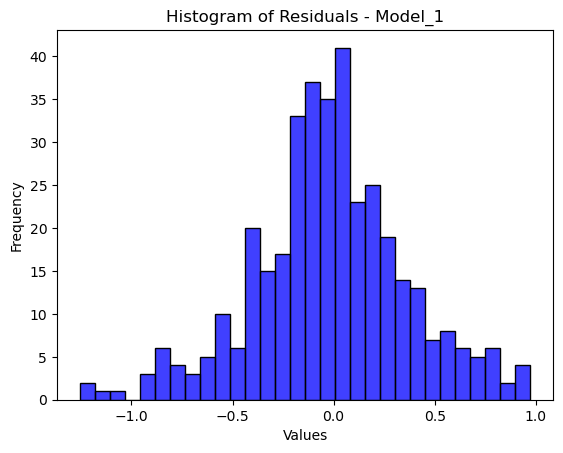

In [12]:
#Create a histogram of the residuals. 

sns.histplot(residuals_df_model_1['Residuals'], bins=30, kde=False, color='blue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - Model_1')
plt.show()

Residuals have a realtively normal distribution and are strongly clustered around 0. 
Not much skew in either direction. 

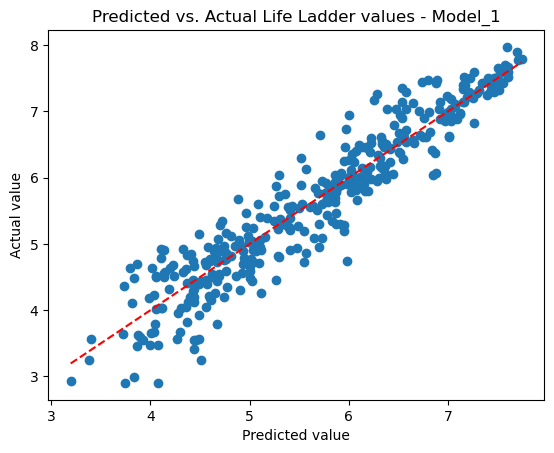

In [13]:
#create actual vs. predicted scatter plot

x_predicted_model_1 = y_pred_model_1_df['y_pred'] 
y_actual_model_1 = y_test['Life Ladder']

plt.scatter(x_predicted_model_1, y_actual_model_1)

# Plot a 45-degree line
plt.plot([min(x_predicted_model_1), max(x_predicted_model_1)], [min(x_predicted_model_1), max(x_predicted_model_1)], color='red', linestyle='--')


# Add labels and title
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs. Actual Life Ladder values - Model_1')

# Add legend
#plt.legend()

# Show the plot
plt.show();


This plot supports the histogram of residual values. The residuals are scatters more or less evenly above or below the actual value.

## Model_1 - Feature Importance<a id='Model_1 - Feature Importance'></a>

The below are feature importances for the global model that includes the columns "Country Name", "Regional Indicator" and "Year"

In [14]:
#Get the array of feature importances from the model. 
importances = global_RF_model.feature_importances_

#Get the list of feature names that the model was trained on
feature_names = X_train.columns

# Zip the feature names with their importances
feature_importance_tuples = list(zip(feature_names, importances))

#Sort the features by importance in decending order
feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

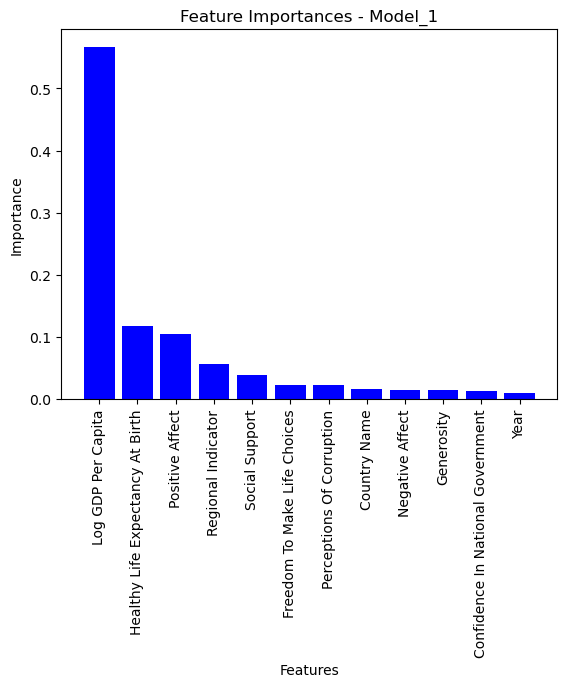

In [15]:
 # Unpack the tuples into separate lists for plotting
features, importances = zip(*feature_importance_tuples)

# Create a bar chart
plt.bar(features, importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Model_1')
plt.xticks(rotation=90)
plt.show()

Log GDP is the clear winner here, followed by healthy life expectancy. 
Both features are indicated to be highly correlated based on previous EDA. They are also both correlated with each other. 
It's interesting how large the feature importance of Log GDP is. 

A suprise here is that "Regional Indicator" comes in so high in feature importance.

# Model_2 - Random Forest model for data lacking identifier columns<a id='Model_2 - Random Forest model for data lacking identifier columns'></a>

Model_2 will use of all of the feature columns in the data set except the ID columns (Country Name, Regional Indicator, Year)

Columns as follows:

'Log GDP Per Capita' 
'Social Support'
'Healthy Life Expectancy At Birth' 
'Freedom To Make Life Choices'
'Generosity' 
'Perceptions Of Corruption' 
'Positive Affect’ 
'Negative Affect' 
'Confidence In National Government'

The target column is 'Life Ladder’

In [16]:
df_global_no_id = df_global.drop(columns = ['Country Name','Regional Indicator','Year'])

In [17]:
df_global_no_id.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [18]:
#Define X and y prior to splitting

target_col = ['Life Ladder']
X = df_global_no_id.drop(target_col, axis = 1)
y = df_global_no_id[target_col]

In [19]:
#Train Test split global data - using test_size = 0.2 and random_state = 42 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [20]:
#Instantiate and Fit the model - using all default parameters - out of the box
global_RF_no_id = RandomForestRegressor()
global_RF_no_id_model = global_RF_no_id.fit(X_train,y_train.values.ravel())

y_pred_model_2 = global_RF_no_id.predict(X_test)

## Model_2 - Performance <a id='Model_2 - Performance'></a>

In [21]:
#compute r2 score for global model
model_2_r2_score_no_id = r2_score(y_test,y_pred_model_2)
print(f"The r2 score for the global model without ID columns is: {model_2_r2_score_no_id}")

The r2 score for the global model without ID columns is: 0.8834054520679178


In [22]:
model_2_mape = mean_absolute_percentage_error(y_test,y_pred_model_2)
print(f"The MAPE score for the global model without ID columns is: {model_2_mape}")

The MAPE score for the global model without ID columns is: 0.06046802680860166


In [23]:
#Reset the index on the test data
y_test_reset = y_test.reset_index(drop = True)

#Make the y_pred array a dataframe and reset the index
y_pred_model_2_df= pd.DataFrame(y_pred_model_2 , columns = ['y_pred'])
y_pred_model_2_df_reset = y_pred_model_2_df.reset_index(drop = True)

#Conact the y_test and y_pred data into a single dataframe
residuals_no_id_df = pd.concat([y_pred_model_2_df_reset,y_test_reset],axis = 1)

#Calculate the residuals for each value in the test set. 
residuals_no_id_df['Residuals'] = residuals_no_id_df['Life Ladder'] - residuals_no_id_df['y_pred']
residuals_no_id_df.head()

,y_pred,Life Ladder,Residuals
0,5.791232,5.597723,-0.193509
1,6.244750,6.290690,0.045941
2,5.702403,4.741295,-0.961108
3,7.323837,6.830125,-0.493711
4,7.178280,7.136701,-0.041579


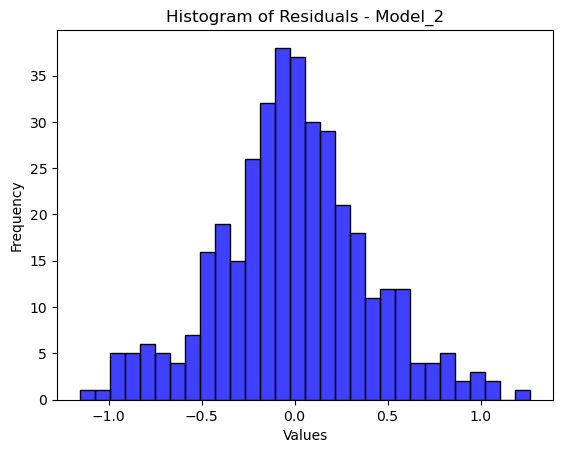

In [24]:
#Create a histogram of the residuals. 

sns.histplot(residuals_no_id_df['Residuals'], bins=30, kde=False, color='blue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - Model_2')
plt.show()

All cluserted around 0 again with no real skew. This model is pretty similar to model_1, so not a huge suprise. 

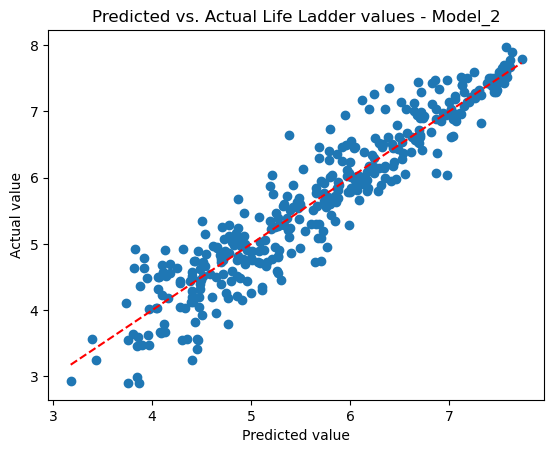

In [25]:
#create actual vs. predicted scatter plot

x_predicted_model_2 = y_pred_model_2_df['y_pred'] 
y_actual_model_2 = y_test['Life Ladder']

plt.scatter(x_predicted_model_2, y_actual_model_2)

# Plot a 45-degree line
plt.plot([min(x_predicted_model_2), max(x_predicted_model_2)], [min(x_predicted_model_2), max(x_predicted_model_2)], color='red', linestyle='--')


# Add labels and title
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs. Actual Life Ladder values - Model_2')

# Add legend
#plt.legend()

# Show the plot
plt.show();

Looks similar to the results from model_1. There is more variablility at the lower end.
EDA indicated that there was more volitility in countries with lower life ladder scores. The model may be havine some troubel sorting out that variation at the low end.
The high end looks solid.

## Model_2 Feature Importance <a id='Model_2 Feature Importance'></a>

In [26]:
#Get the array of feature importances from the model. 
importances = global_RF_no_id_model.feature_importances_

#Get the list of feature names that the model was trained on
feature_names = X_train.columns

# Zip the feature names with their importances
feature_importance_tuples = list(zip(feature_names, importances))

#Sort the features by importance in decending order
feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

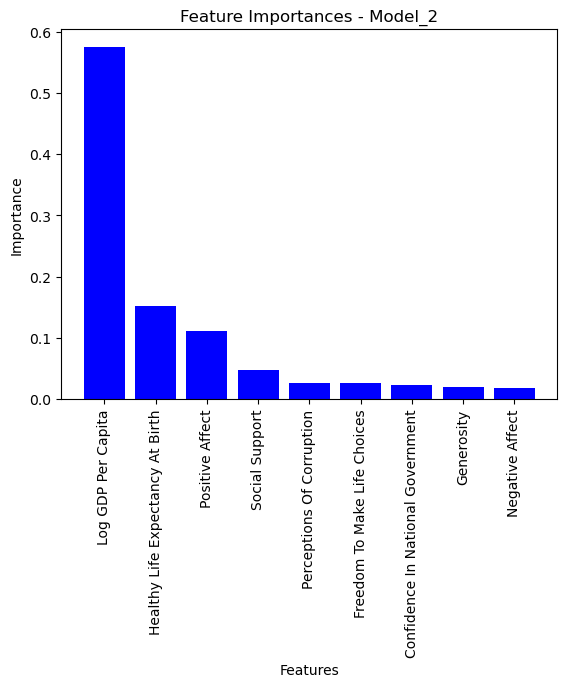

In [27]:
 # Unpack the tuples into separate lists for plotting
features, importances = zip(*feature_importance_tuples)

# Create a bar chart
plt.bar(features, importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Model_2')
plt.xticks(rotation=90)
plt.show()

No real changes in feature importance. We've removed the ID type columns, so "Regional Indicator" is gone from 
the 4th spot. Social support was just behind "Regional Indicator" in te previous and has now moved up one. 
The last thre features have reversed themselves in importance, but they are so low that is doesn't seem like this could have much
impact at all. 

Log GDP and life Exepctancy are still dominating. 

# Model_3 - Random Forest model - columns with high target correlation<a id='Model_3 - Random Forest model - columns with high target correlation'></a>

The EDA notebook revealed that the columns that had the highest correlation with our Life Ladder Target variable were as follows:

Log GDP Per Capita - strong correlation of 0.8

Social Support - strong correlation of 0.72

Healthy Life Expectancy At Birth - strong correlation of 0.74

Freedom To Make Life Choices - moderate correlation of 0.57

Positive Affect - moderate correlation of 0.52



Model_3 will use the 3 columns with the highest correlation.

Columns as follows:

'Log GDP Per Capita' 
'Social Support'
'Healthy Life Expectancy At Birth' 


The target column is 'Life Ladder’

In [28]:
cols_to_drop_high_corr_model = ['Country Name','Regional Indicator','Year','Freedom To Make Life Choices','Generosity','Perceptions Of Corruption','Positive Affect','Negative Affect','Confidence In National Government']

df_global_high_corr = df_global.drop(columns = cols_to_drop_high_corr_model)

In [29]:
df_global_high_corr.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth
0,3.723590,7.350416,0.450662,50.500000
1,4.401778,7.508646,0.552308,50.799999
2,4.758381,7.613900,0.539075,51.099998
3,3.831719,7.581259,0.521104,51.400002
4,3.782938,7.660506,0.520637,51.700001


In [30]:
#Define X and y prior to splitting

target_col = ['Life Ladder']
X = df_global_high_corr.drop(target_col, axis = 1)
y = df_global_high_corr[target_col]

In [31]:
#Train Test split global data - using test_size = 0.2 and random_state = 42 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [32]:
#Instantiate and Fit the model - using all default parameters - out of the box
global_RF_high_corr = RandomForestRegressor()
global_RF_high_corr_model = global_RF_high_corr.fit(X_train,y_train.values.ravel())

y_pred_model_3 = global_RF_high_corr_model.predict(X_test)

## Model_3 - Performance <a id='Model_3 - Performance'></a>

In [33]:
#compute r2 score for global model
model_3_r2_score_global_high_corr = r2_score(y_test,y_pred_model_3)
print(f"The r2 score for the global model with only high correlation columns is: {model_3_r2_score_global_high_corr}")

The r2 score for the global model with only high correlation columns is: 0.8125564065794947


In [34]:
model_3_mape = mean_absolute_percentage_error(y_test,y_pred_model_3)
print(f"The MAPE score for the global model with only high correlation columns is: {model_3_mape}")

The MAPE score for the global model with only high correlation columns is: 0.07417966686935898


In [35]:
#Reset the index on the test data
y_test_reset = y_test.reset_index(drop = True)

#Make the y_pred array a dataframe and reset the index
y_pred_model_3_df = pd.DataFrame(y_pred_model_3, columns = ['y_pred'])
y_pred_model_3_df_reset = y_pred_model_3_df.reset_index(drop = True)

#Conact the y_test and y_pred data into a single dataframe
residuals_high_corr_df = pd.concat([y_pred_model_3_df_reset,y_test_reset],axis = 1)

#Calculate the residuals for each value in the test set. 
residuals_high_corr_df['Residuals'] = residuals_high_corr_df['Life Ladder'] - residuals_high_corr_df['y_pred']
residuals_high_corr_df.head()

,y_pred,Life Ladder,Residuals
0,6.001587,5.597723,-0.403864
1,6.298921,6.290690,-0.008231
2,5.513064,4.741295,-0.771770
3,7.350624,6.830125,-0.520499
4,7.105750,7.136701,0.030951


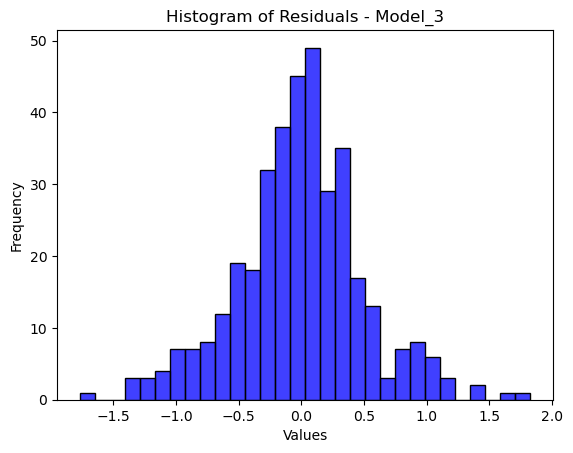

In [36]:
#Create a histogram of the residuals. 

sns.histplot(residuals_high_corr_df['Residuals'], bins=30, kde=False, color='blue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - Model_3')
plt.show()

Similar to models 1 and 2. Residuals are clustered around 0. No serious skew.

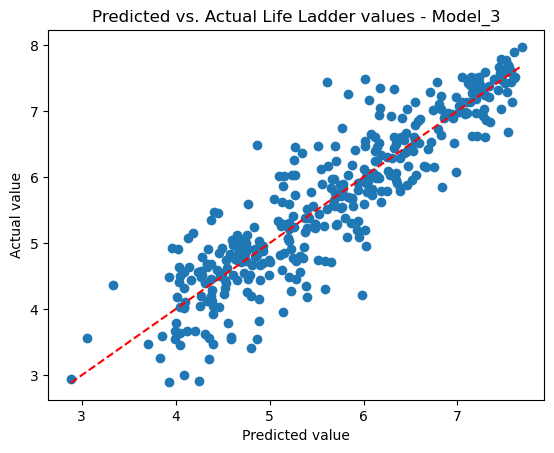

In [37]:
x_predicted_model_3 = y_pred_model_3_df['y_pred'] 
y_actual_model_3 = y_test['Life Ladder']

plt.scatter(x_predicted_model_3, y_actual_model_3)

# Plot a 45-degree line
plt.plot([min(x_predicted_model_3), max(x_predicted_model_3)], [min(x_predicted_model_3), max(x_predicted_model_3)], color='red', linestyle='--')


# Add labels and title
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs. Actual Life Ladder values - Model_3')

# Add legend
#plt.legend()

# Show the plot
plt.show();


Looks like more variability than models 1 and 2 in general. The overall pattern of variation is similar. 
We've removed a lot of features for model_3, so it makes sense that we would see some drop in accuracy of the model. 
The fact that the overall scatter plot is similar indicated that we're explaining a lot of the variablity in our data using just the 
3 highly coorelated features in model_3

## Model_3 -  Feature Importance<a id='Model_3 -  Feature Importance'></a>

In [38]:
#Get the array of feature importances from the model. 
importances = global_RF_high_corr_model.feature_importances_

#Get the list of feature names that the model was trained on
feature_names = X_train.columns

# Zip the feature names with their importances
feature_importance_tuples = list(zip(feature_names, importances))

#Sort the features by importance in decending order
feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

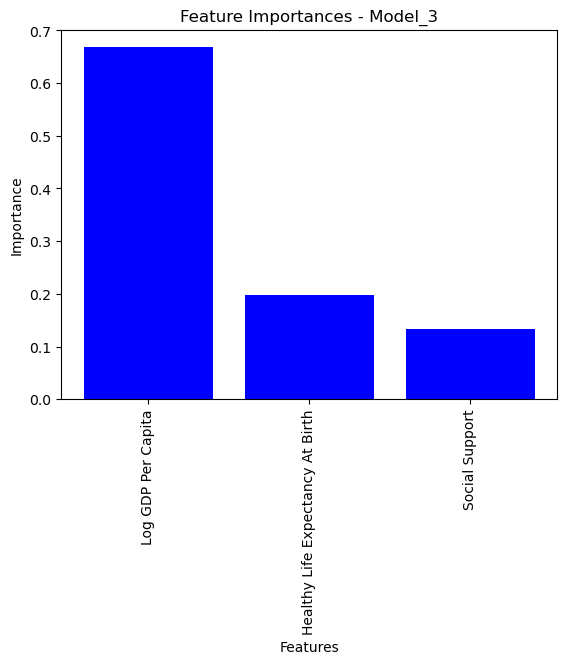

In [39]:
 # Unpack the tuples into separate lists for plotting
features, importances = zip(*feature_importance_tuples)

# Create a bar chart
plt.bar(features, importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Model_3')
plt.xticks(rotation=90)
plt.show()

Log GPD and life expectancy are still in the 1 and 2 slots. With GDP still far ahead in terms of importance. 

# Model_4 - Random Forest model - columns with high to moderate target correlation<a id='Model_4 - Random Forest model - columns with high to moderate target correlation'></a>

Model_4 will use the 3 columns with the highest correlation plus the two columsn taht EDA showed to be moderately correlated.

Columns as follows:

'Log GDP Per Capita' 
'Social Support'
'Healthy Life Expectancy At Birth'
'Freedom To Make Life Choices'
'Positive Affect'


The target column is 'Life Ladder’


In [40]:
cols_to_drop_moderate_corr_model = ['Country Name','Regional Indicator','Year','Generosity','Perceptions Of Corruption','Negative Affect','Confidence In National Government']

df_global_moderate_corr = df_global.drop(columns = cols_to_drop_moderate_corr_model)

In [41]:
df_global_moderate_corr.head()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Positive Affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.414297
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.481421
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.516907
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.479835
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.613513


In [42]:
#Define X and y prior to splitting

target_col = ['Life Ladder']
X = df_global_moderate_corr.drop(target_col, axis = 1)
y = df_global_moderate_corr[target_col]

In [43]:
#Train Test split global data - using test_size = 0.2 and random_state = 42 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [44]:
#Instantiate and Fit the model - using all default parameters - out of the boxg
global_RF_moderate_corr = RandomForestRegressor()
global_RF_moderate_corr_model = global_RF.fit(X_train,y_train.values.ravel())

y_pred_model_4 = global_RF_model.predict(X_test)

## Model_4 - Performance<a id='Model_4 - Performance'></a>

In [45]:
#compute r2 score for global model
model_4_r2_score_moderate_corr = r2_score(y_test,y_pred_model_4)
print(f"The r2 score for the global model with high and moderate correlations columns is: {model_4_r2_score_moderate_corr}")

The r2 score for the global model with high and moderate correlations columns is: 0.8592182615566886


In [46]:
model_4_mape = mean_absolute_percentage_error(y_test,y_pred_model_4)
print(f"The MAPE score for the global model with high and moderate correlations columns is: {model_4_mape}")

The MAPE score for the global model with high and moderate correlations columns is: 0.06713454881347278


In [47]:
#Reset the index on the test data
y_test_reset = y_test.reset_index(drop = True)

#Make the y_pred array a dataframe and reset the index
y_pred_model_4_df = pd.DataFrame(y_pred_model_4, columns = ['y_pred'])
y_pred_model_4_df_reset = y_pred_model_4_df.reset_index(drop = True)

#Conact the y_test and y_pred data into a single dataframe
residuals_moderate_corr_df = pd.concat([y_pred_model_4_df_reset,y_test_reset],axis = 1)

#Calculate the residuals for each value in the test set. 
residuals_moderate_corr_df['Residuals'] = residuals_moderate_corr_df['Life Ladder'] - residuals_moderate_corr_df['y_pred']
residuals_moderate_corr_df.head()

,y_pred,Life Ladder,Residuals
0,5.753511,5.597723,-0.155788
1,6.327334,6.290690,-0.036644
2,6.133936,4.741295,-1.392641
3,7.252862,6.830125,-0.422737
4,7.019651,7.136701,0.117050


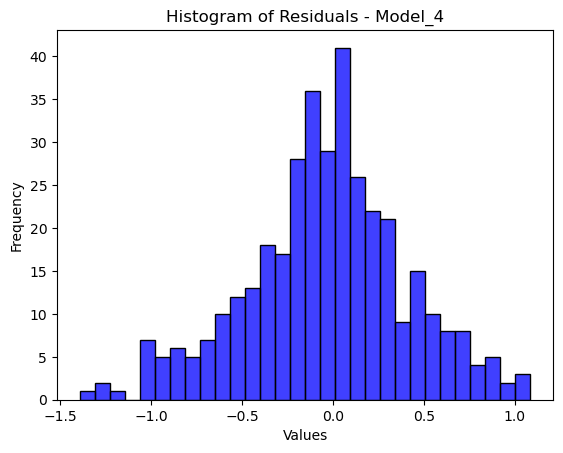

In [48]:
#Create a histogram of the residuals. 

sns.histplot(residuals_moderate_corr_df['Residuals'], bins=30, kde=False, color='blue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - Model_4')
plt.show()

Startig to see some skew in the residuals here. Looks like we're seeing more predictions on the low side. 

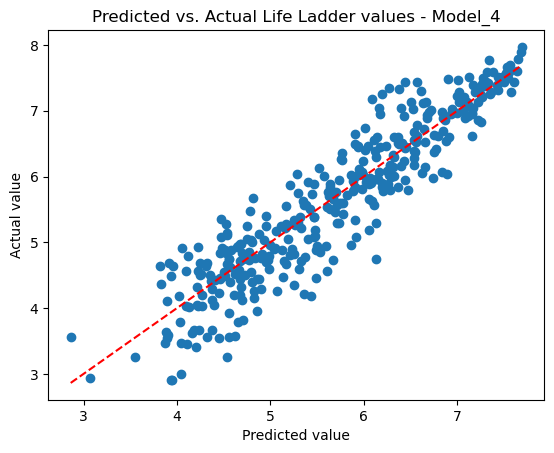

In [49]:
#create actual vs. predicted scatter plot

x_predicted_model_4 = y_pred_model_4_df['y_pred'] 
y_actual_model_4 = y_test['Life Ladder']

plt.scatter(x_predicted_model_4, y_actual_model_4)

# Plot a 45-degree line
plt.plot([min(x_predicted_model_4), max(x_predicted_model_4)], [min(x_predicted_model_4), max(x_predicted_model_4)], color='red', linestyle='--')


# Add labels and title
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs. Actual Life Ladder values - Model_4')

# Add legend
#plt.legend()

# Show the plot
plt.show();


Still the same basic shape as the other models. More variation at the lower values better prediction as the values climb. 
Adding the additional features doesn't seem to have helped us make better predictions. If anything it may have made it slightly worse
by introducing some new skew in the residual values.  

## Model_4 - Feature importances <a id='Model_4 - Feature importances'></a>

In [50]:
#Get the array of feature importances from the model. 
importances = global_RF_moderate_corr_model.feature_importances_

#Get the list of feature names that the model was trained on
feature_names = X_train.columns

# Zip the feature names with their importances
feature_importance_tuples = list(zip(feature_names, importances))

#Sort the features by importance in decending order
feature_importance_tuples = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

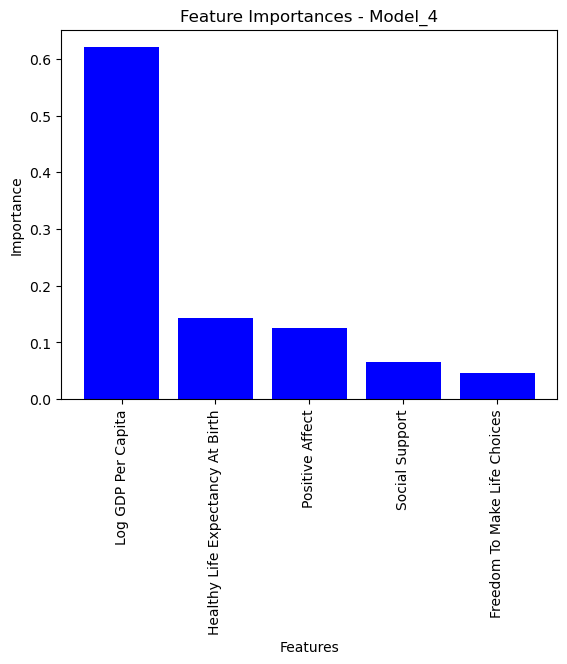

In [51]:
 # Unpack the tuples into separate lists for plotting
features, importances = zip(*feature_importance_tuples)

# Create a bar chart
plt.bar(features, importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - Model_4')
plt.xticks(rotation=90)
plt.show()

Same features as we've seen in the other models in more or less the same order. Log GPD still the most important by a long way.

# Additional EDA for country level modeling<a id='Additional EDA for country level modeling'></a>

We want to determine which countries we have the most data points for. 
The most rows any one country could have would be 18, since the data contains rows from 2005 to 2022
Data from 2005 was sparse in the initial data set before cleaning.

In [52]:
df_global_country_level_EDA = pd.read_csv('../data/interim/cleaned_data.csv', index_col = 0)

In [53]:
df_global_country_level_EDA.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [54]:
#Determine which countries we have the most data for - These will be canidates for further training.

country_list = []
for country in df_global_country_level_EDA['Country Name'].unique():
    length= len(df_global_country_level_EDA[df_global_country_level_EDA['Country Name']== country])
    if length >= 17:
        country_list.append(country)

print(country_list)
print(len(country_list))

['Argentina', 'Bangladesh', 'Bolivia', 'Brazil', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'France', 'Georgia', 'Germany', 'Ghana', 'India', 'Indonesia', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Lithuania', 'Mexico', 'Moldova', 'Nepal', 'Nicaragua', 'Peru', 'Russia', 'Senegal', 'South Korea', 'Spain', 'Tanzania', 'Thailand', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
42


In [55]:
#Determine which regions we have the most data for

region_list = []
for region in df_global_country_level_EDA['Regional Indicator'].unique():
    length= len(df_global_country_level_EDA[df_global_country_level_EDA['Regional Indicator']== region])
    print(region + ' ' + str(length))

South Asia 97
Sub-Saharan Africa 456
Latin America and Caribbean 323
Commonwealth of Independent States 158
North America and ANZ 66
Western Europe 300
Central and Eastern Europe 204
Middle East and North Africa 86
East Asia 73
Southeast Asia 88


After data wrangling and cleaning, we have 42 countries with 17 data points, but no countries that have the full 18. 

The regions with the most data are as follows:

Sub-Saharan Africa - 456 rows

Latin America and Caribbean - 323 rows

Western Europe - 300 rows


For initial country modeling, we'll choose a country from Sub_Saharan Africa with 17 data points. 
This will make it easier to do an additional model at the regional level later if we want. 

The country we will try to model first will be Cameroon

# Model_5 - Random Forest model for country level data<a id='Model_5 - Random Forest model for country level data'></a>

In [56]:
#We have already encoded the global data set - we need to determine which country label corresponds to the country we want to model. 

label_map = dict(zip(country_label_encoder.classes_,country_label_encoder.transform(country_label_encoder.classes_))) 
cameroon_label = label_map['Cameroon']
print(f'The label for Cameroon is {cameroon_label}.')


The label for Cameroon is 20.


In [57]:
#Split off country level data from Global Data - the global data is encoded - so we need to determine which encoded label is Cameroon

df_cameroon = df_global[df_global['Country Name'] == 20]

print(len(df_cameroon))
df_cameroon.head()

17


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
256,20,8,2006,3.851072,8.089928,0.689601,47.840000,0.653423,-0.017282,0.907068,0.588019,0.270874,0.432124
257,20,8,2007,4.349939,8.104486,0.717394,48.279999,0.643884,-0.038914,0.910350,0.629791,0.248631,0.408500
258,20,8,2008,4.291800,8.104196,0.696716,48.720001,0.580257,-0.076012,0.945003,0.612912,0.312485,0.314643
259,20,8,2009,4.741408,8.101195,0.728694,49.160000,0.698030,-0.023993,0.925447,0.591878,0.249822,0.366201
260,20,8,2010,4.554257,8.101261,0.758641,49.599998,0.792220,-0.004476,0.874719,0.593696,0.273786,0.513923


In [58]:
df_cameroon.shape

(17, 13)

There are 17 rows and 13 columns in our country level data. It's not wider than it is tall, but it almost is. 

In [59]:
#Define X and y prior to splitting

target_col = ['Life Ladder']
X = df_cameroon.drop(target_col, axis = 1)
y = df_cameroon[target_col]

In [60]:
#Train Test split global data - using test_size = 0.2 and random_state = 42 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [61]:
#Instantiate and Fit the model - using all default parameters - out of the box
cameroon_RF = RandomForestRegressor()
cameroon_RF_model = global_RF.fit(X_train,y_train.values.ravel())

y_pred_model_5 = cameroon_RF_model.predict(X_test)

## Model_5 Performance <a id='Model_5 Performance'></a>

In [62]:
#compute r2 score for global model
r2_score_cameroon = r2_score(y_test,y_pred_model_5)
print(f"The r2 score for the global model is: {r2_score_cameroon}")

The r2 score for the global model is: -0.18510920380995555


In [63]:
mape = mean_absolute_percentage_error(y_test,y_pred_model_5)
print(f"The MAPE score for the cameroon model is: {mape}")

The MAPE score for the cameroon model is: 0.07013607438393958


In [64]:
#Reset the index on the test data
y_test_reset = y_test.reset_index(drop = True)

#Make the y_pred array a dataframe and reset the index
y_pred_model_5_df = pd.DataFrame(y_pred_model_5, columns = ['y_pred'])
y_pred_model_5_df_reset = y_pred_model_5_df.reset_index(drop = True)

#Conact the y_test and y_pred data into a single dataframe
residuals_cameroon_df = pd.concat([y_pred_model_5_df_reset,y_test_reset],axis = 1)

#Calculate the residuals for each value in the test set. 
residuals_cameroon_df['Residuals'] = residuals_cameroon_df['Life Ladder'] - residuals_cameroon_df['y_pred']
residuals_cameroon_df.head()


,y_pred,Life Ladder,Residuals
0,4.686354,3.851072,-0.835282
1,4.518886,4.349939,-0.168947
2,4.454172,4.433885,-0.020287
3,4.862331,4.962748,0.100416


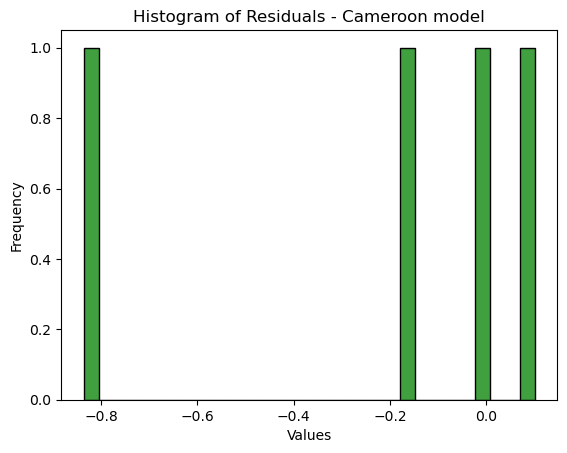

In [65]:
sns.histplot(residuals_cameroon_df['Residuals'], bins=30, kde=False, color='green', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - Cameroon model')
plt.show()

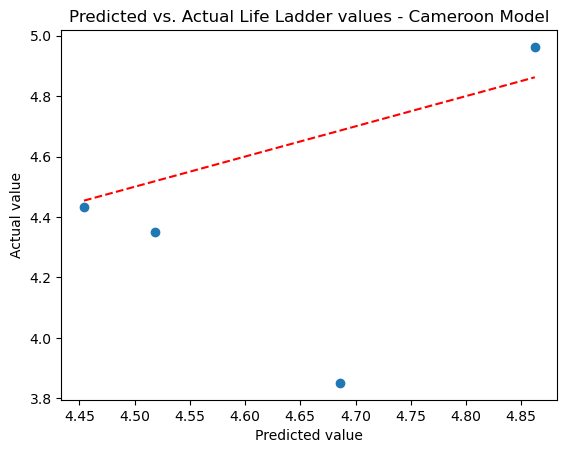

In [66]:
#create actual vs. predicted scatter plot

x_predicted_model_5 = y_pred_model_5_df['y_pred'] 
y_actual = y_test['Life Ladder']

plt.scatter(x_predicted_model_5, y_actual)

# Plot a 45-degree line
plt.plot([min(x_predicted_model_5), max(x_predicted_model_5)], [min(x_predicted_model_5), max(x_predicted_model_5)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs. Actual Life Ladder values - Cameroon Model')

# Add legend
#plt.legend()

# Show the plot
plt.show();


We seem to be suffering from a lack of available data at the country level. When we train on the data we have, and leave 20% for testing, we get just a few data points for prediction.
Looks like we need more data to look at this level of analysis. 
This same problem would occur with all the countries we have data for - the maximum number of data points we have for a given country is 17. 

Bascially there is not enough data for any country in the data set to do a country level analysis. 
After training, the amount of data left for testing is just not enough to continue developing the model. 

# Model Comparisons <a id='Model Comparisons'></a>


The below comparisons are only for models 1-4. 

Model_5 which deals with country level data did not have enough data points to be viable. 

## r2 <a id='r2'></a>

In [67]:
print(model_1_r2_score_global)
print(model_2_r2_score_no_id)
print(model_3_r2_score_global_high_corr)
print(model_4_r2_score_moderate_corr)

0.8947686488482727
0.8834054520679178
0.8125564065794947
0.8592182615566886


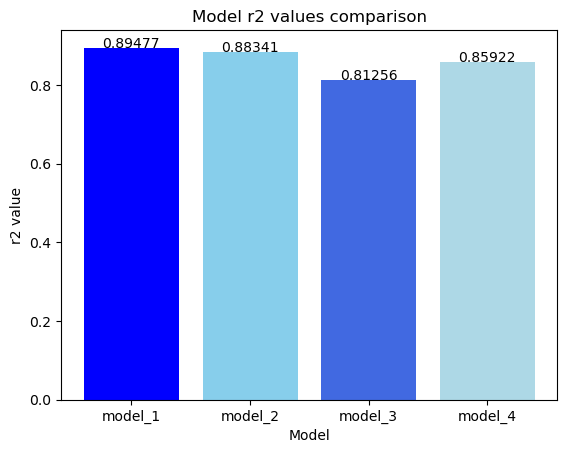

In [68]:
categories = ['model_1','model_2', 'model_3', 'model_4']
values = [model_1_r2_score_global, model_2_r2_score_no_id, model_3_r2_score_global_high_corr, model_4_r2_score_moderate_corr]

#Define bar colors
bar_colors = ['blue','skyblue', 'royalblue', 'lightblue']

# Create bar chart
plt.bar(categories, values, color=bar_colors )

# Add labels and title
plt.xlabel('Model')
plt.ylabel('r2 value')
plt.title('Model r2 values comparison')


for i in range(len(categories)):
    plt.text(x = categories[i], y = values[i],s = str(round(values[i],5)), ha='center')



# Show plot
plt.show()


model_1 is the best by a very small margin. There is still a lot of room for improvement since no parameter tuning was done here. 

model_2 is a close second and was based on fewer features. That being said, we say a suprisingly high feature imprtance for "Regional Indicator"
in model_1. So we know we're losing some information by excluding that. 

model_3 is based on only 3 features and has a good score considering how many features we eliminated. 

model_4 benefits significantly from the 2 additonal features that were not included in model_3.

The seems to come down to computation needs. There are not many features in the data set, certainly not enough to cause a concern in terms of computation so there doesn't seem to be any reason not to go for model_1 based on the r2 scores. 

If we needed to reduce the features then model_3 or model_4 would be a good choice for further development. They are explaining a lot of the variation in the date set with a small subset of features. 

## MAPE <a id='MAPE'></a>

In [69]:
print(model_1_mape)
print(model_2_mape)
print(model_3_mape)
print(model_4_mape)

0.057415516414224044
0.06046802680860166
0.07417966686935898
0.06713454881347278


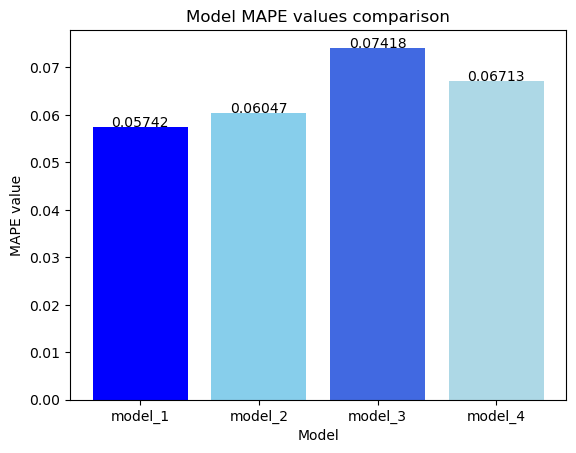

In [70]:
categories = ['model_1','model_2', 'model_3', 'model_4']
values = [model_1_mape, model_2_mape, model_3_mape, model_4_mape]

#Define bar colors
bar_colors = ['blue','skyblue', 'royalblue', 'lightblue']

# Create bar chart
plt.bar(categories, values, color=bar_colors )

# Add labels and title
plt.xlabel('Model')
plt.ylabel('MAPE value')
plt.title('Model MAPE values comparison')


for i in range(len(categories)):
    plt.text(x = categories[i], y = values[i],s = str(round(values[i],5)), ha='center')



# Show plot
plt.show()

Again model_1 has the best performance. No reason not to use model_1 as the basis for future development. 

## Residuals <a id='Residuals'></a>

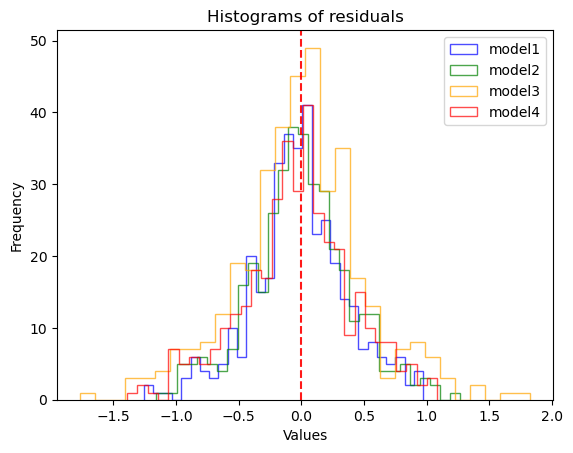

In [71]:
#Data for model histograms
model1 = residuals_df_model_1['Residuals']
model2 = residuals_no_id_df['Residuals']
model3 = residuals_high_corr_df['Residuals']
model4 = residuals_moderate_corr_df['Residuals']

# Plot histograms with transparency
plt.hist(model1, bins=30, color='blue', alpha=0.7,histtype='step', label='model1')
plt.hist(model2, bins=30, color='green', alpha=0.7,histtype='step', label='model2')
plt.hist(model3, bins=30, color='orange', alpha=0.7,histtype='step', label='model3')
plt.hist(model4, bins=30, color='red', alpha=0.7,histtype='step', label='model4')


#plot line
plt.axvline(x=0.0, color='r',alpha=0.9, linestyle='--')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of residuals')
plt.legend()

# Show plot
plt.show()


Another reinforcement of what we saw above in terms of residuals. All the models are clustering around 0 in more or less the same way. 

## Actual Vs. Predicted Values  <a id='Actual Vs. Predicted Values'></a>

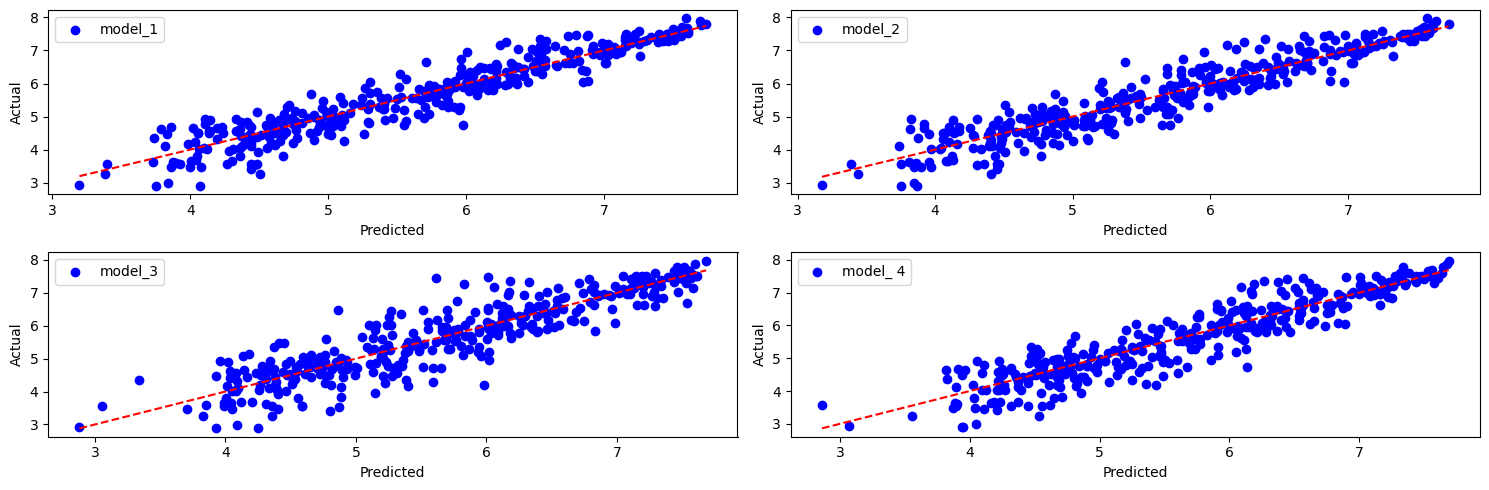

In [82]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 5),tight_layout=True)

# Plot scatter plots
axs[0,0].scatter(x_predicted_model_1, y_actual_model_1, color='blue', label='model_1')
axs[0,0].plot([min(x_predicted_model_1), max(x_predicted_model_1)], [min(x_predicted_model_1), max(x_predicted_model_1)], color='red', linestyle='--')

axs[0,1].scatter(x_predicted_model_2, y_actual_model_2, color='blue', label='model_2')
axs[0,1].plot([min(x_predicted_model_2), max(x_predicted_model_2)], [min(x_predicted_model_2), max(x_predicted_model_2)], color='red', linestyle='--')

axs[1,0].scatter(x_predicted_model_3, y_actual_model_3, color='blue', label='model_3')
axs[1,0].plot([min(x_predicted_model_3), max(x_predicted_model_3)], [min(x_predicted_model_3), max(x_predicted_model_3)], color='red', linestyle='--')


axs[1,1].scatter(x_predicted_model_4, y_actual_model_4, color='blue', label='model_ 4')
axs[1,1].plot([min(x_predicted_model_4), max(x_predicted_model_4)], [min(x_predicted_model_4), max(x_predicted_model_4)], color='red', linestyle='--')



# Add labels and legends
for i in range(2):
    for j in range(2):
        axs[i, j].set_xlabel('Predicted')
        axs[i, j].set_ylabel('Actual')
        axs[i, j].legend()
        
    

# Show plot
plt.show()


All plots of predicted vs. actual values are generally similar, with slightly more varation in the residuals on models 3 and 4. 
Nothing here indicating that using all the features as model_1 did is not the best course of action for the final model development. 

## Feature Importance <a id='Feature Importance'></a>

In all 4 models the "Log GDP" feature was by far the most important. In every case it was followed by "Healthy Life Expectancy". 
The 3rd most important feature was "Positive Affect" in models 1, 2 and 4. It was "Social Support in model_3, but this seems to be because the "Positive Affect"
feature was eliminated for that model.

# Parameter Space Exploraton <a id='Parameter Space Exploraton'></a>

We now have an understanding of which features to include in our model and what the relative importances of those features might be. 
All the exploration done so far has been done using RF regressor models with the default settings. 
We'll want to tune the models parameters to see if we can increase the model performance.

The RF regressor model has about 20 tuneable paramters, makeing for a massive potential search space. 
A GridsearchCV type approach was tired during the development of this notebook and had to be stopped after approximately 20 hours
of processing time. 

As an alternative to GridsearchCV, we'll be exploring the part of the parameter space using the OOB score. 


# OOB score<a id='oob score'></a>

In [9]:
target_col = ['Life Ladder']
X = df_global.drop(target_col, axis = 1)
y = df_global[target_col]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [17]:
# Define hyperparameters to tune
n_estimators_values = [100, 500, 1000, 2000, 5000, 10000, 12000]
max_depth_values = [None,4,8,10]    
min_samples_split_values = [2,5,10]   
min_samples_leaf_values = [1,5,10] 
max_features_values = ['sqrt',None]


best_score = float('-inf')
best_params = {}


iter_counter = 0
index_list = []
oob_list = []
r2_oob_list= []
mae_oob_list = []
n_estimators_list = []
params_list = []

# Iterate over all combinations of hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                for max_features in max_features_values:
                
                #for max_features in max_features_values:
                
                # Create model with current hyperparameters
                    rf_model = RandomForestRegressor(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf= min_samples_leaf,
                            max_features = max_features,
                            oob_score=True,  # Enable OOB scoring
                            random_state=42)
                
                # Fit model and calculate OOB score
                    rf_model.fit(X_train, y_train.values.ravel())
                
                    r2_oob_score = rf_model.oob_score_
                    r2_oob = r2_score(y_train,rf_model.oob_prediction_)
                    mae_oob = mean_absolute_error(y_train,rf_model.oob_prediction_)

                    params = {'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features}

             
                # Update best parameters if current model performs better
                    if r2_oob_score > best_score:
                        best_score = r2_oob_score
                        best_params = {'n_estimators': n_estimators,
                                   'max_depth': max_depth,
                                   'min_samples_split': min_samples_split,
                                   'min_samples_leaf': min_samples_leaf,
                                   'max_features': max_features}
                    
                #update lists for visualization

                    index_list.append(iter_counter)
                    oob_list.append(r2_oob_score)
                    r2_oob_list.append(r2_oob)
                    mae_oob_list.append(mae_oob)
                    n_estimators_list.append(n_estimators)
                    params_list.append(params)
                    
                    iter_counter += 1

In [30]:
print("r2_oob_score: ", best_score)
print("Best parameters found: ", best_params)
print('\n')

r2_oob_score:  0.9039516216276363
Best parameters found:  {'n_estimators': 10000, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}




In [32]:
r2_params = list(zip(r2_oob_list, params_list))

best_r2_values = []
best_r2_score = float('-inf')

for value in n_estimators_values:
    for item in r2_params:
        if item[1]['n_estimators'] == value:
            if item[0] > best_r2_score:
                best_r2_score = item[0]
    
    best_r2_values.append(best_r2_score)


print(best_r2_values)

            

[0.8992500809674824, 0.9032604572945607, 0.9034686793421749, 0.903748504145886, 0.9038722160553793, 0.9039516216276363, 0.9039516216276363]


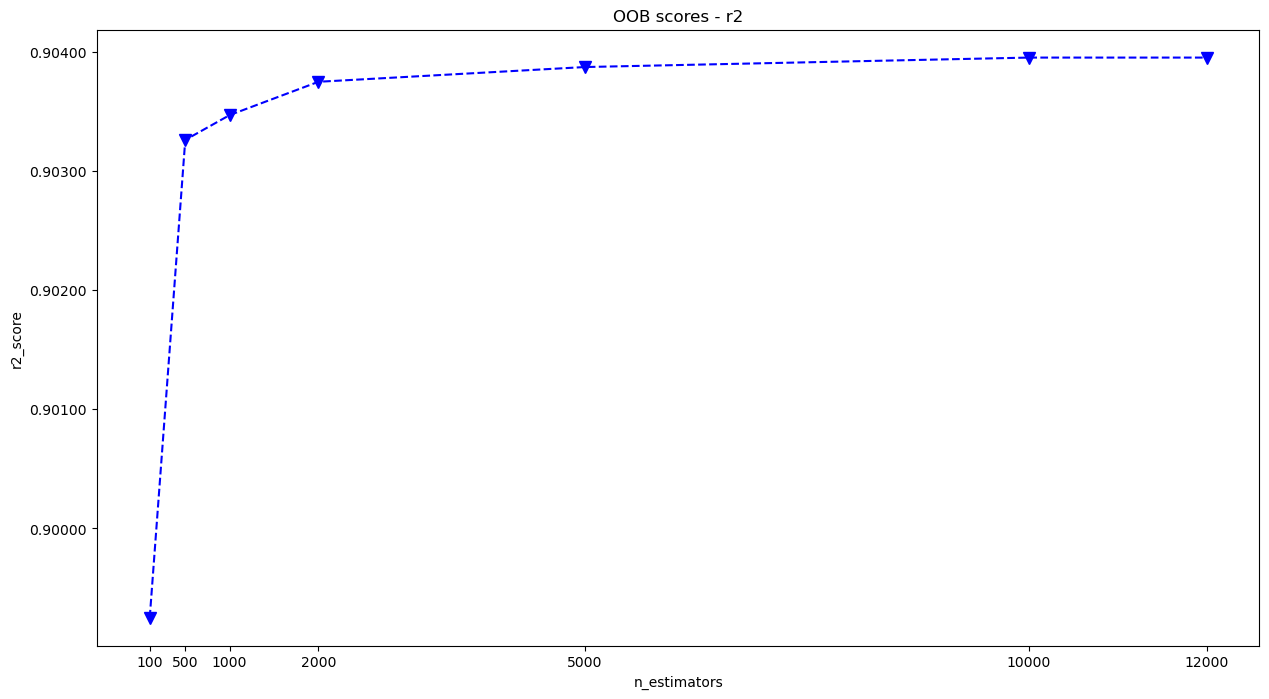

In [34]:
# Sample data
x_values = n_estimators_values
#y_values = oob_list_rounded
#y_values_2 = r2_oob_list_rounded

plt.figure(figsize=(15, 8))

# Create a line plot with customized properties
#plt.plot(x_values, oob_list, color='red', linestyle='--', marker='o', markersize=8)
plt.plot(x_values, best_r2_values, color='blue', linestyle='--', marker='v', markersize=8)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.5f}'))

# Add labels and title
plt.xlabel('n_estimators')
plt.xticks(n_estimators_values)
plt.ylabel('r2_score')

plt.title('OOB scores - r2')


# Display the plot
plt.show()

We can see that the r2 score increases rapidly as we add more estimators. 
It levels out after 5000 but seems to continue increasing up to 10,000 and possibly all the way up to 12,000.
This would seem to narrow the parameter space in terms of n_estimators to somewhere between 5,000 and 12,000. 

In [45]:
#Create a list of the best (lowest) MAE scores for each n_estimators setting

mae_oob_params = list(zip(mae_oob_list, params_list))

best_mae_values = []
best_mae_score = float('inf')

for value in n_estimators_values:
    for item in mae_oob_params:
        if item[1]['n_estimators'] == value:
            if item[0] < best_mae_score:
                best_mae_score = item[0]
    
    best_mae_values.append(best_mae_score)


print(best_mae_values)

[0.26870867787775987, 0.2685935388852467, 0.26849858549614425, 0.2684761545299406, 0.2684761545299406, 0.2684761545299406]


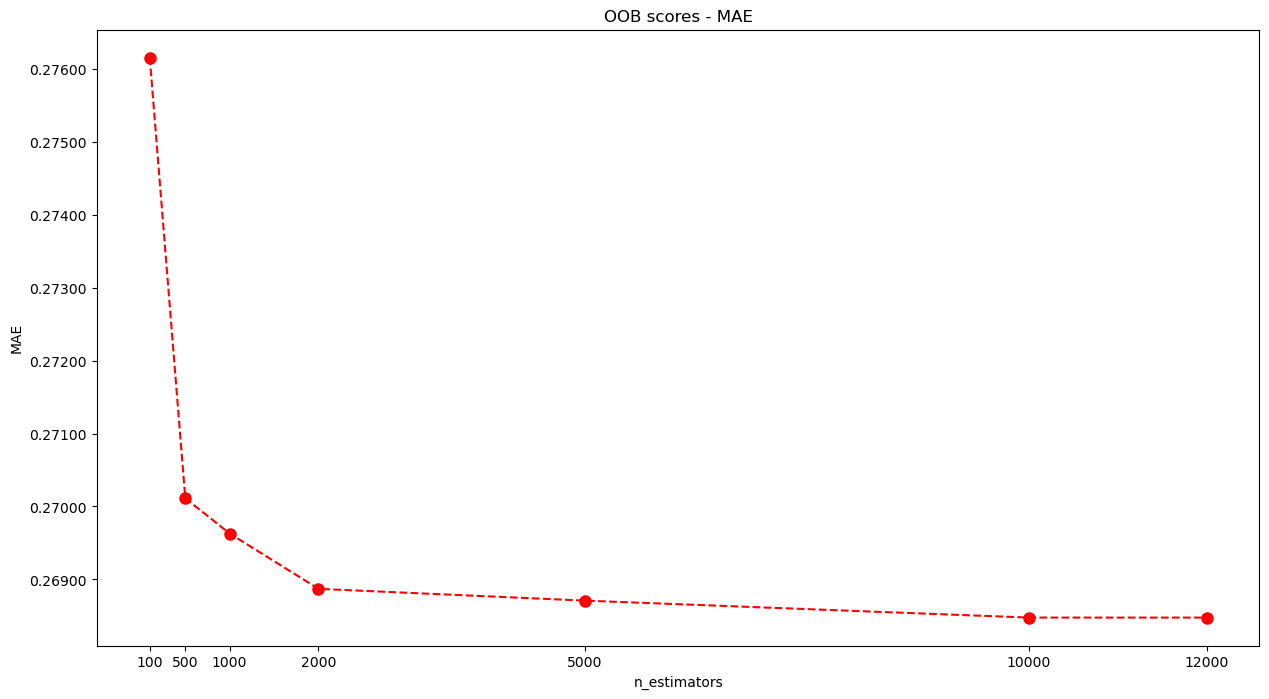

In [38]:
# Data
x_values = n_estimators_values
y_values = best_mae_values


plt.figure(figsize=(15, 8))

# Create a line plot with customized properties
plt.plot(x_values, y_values, color='red', linestyle='--', marker='o', markersize=8)
#plt.plot(x_values, y_values_2, color='blue', linestyle='--', marker='v', markersize=8)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.5f}')) 

# Add labels and title
plt.xlabel('n_estimators')
plt.xticks(n_estimators_values)

plt.ylabel('MAE')
plt.title('OOB scores - MAE')

# Display the plot
plt.show()

We see a simlar pattern to the r2 behavior here. As n_estimators increases, the MAE goes down. 
Like r2 it seems to level out somewhere around the 10,000 - 12,000 range. 

We'll repeat the same OOB search for a new narrower set of n_estimators below. 
All other parameters are the same, we want to narrow down the possible n_estimators number before 
doing a final deep dive in the next notebook.

In [39]:
# Define hyperparameters to tune
n_estimators_values = [5000, 8000, 9000, 10000, 11000, 12000]
max_depth_values = [None,4,8,10]    
min_samples_split_values = [2,5,10]   
min_samples_leaf_values = [1,5,10] 
max_features_values = ['sqrt',None]


best_score = float('-inf')
best_params = {}


iter_counter = 0
index_list = []
oob_list = []
r2_oob_list= []
mae_oob_list = []
n_estimators_list = []
params_list = []

# Iterate over all combinations of hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                for max_features in max_features_values:
                
                #for max_features in max_features_values:
                
                # Create model with current hyperparameters
                    rf_model = RandomForestRegressor(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf= min_samples_leaf,
                            max_features = max_features,
                            oob_score=True,  # Enable OOB scoring
                            random_state=42)
                
                # Fit model and calculate OOB score
                    rf_model.fit(X_train, y_train.values.ravel())
                
                    r2_oob_score = rf_model.oob_score_
                    r2_oob = r2_score(y_train,rf_model.oob_prediction_)
                    mae_oob = mean_absolute_error(y_train,rf_model.oob_prediction_)

                    params = {'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features}

             
                # Update best parameters if current model performs better
                    if r2_oob_score > best_score:
                        best_score = r2_oob_score
                        best_params = {'n_estimators': n_estimators,
                                   'max_depth': max_depth,
                                   'min_samples_split': min_samples_split,
                                   'min_samples_leaf': min_samples_leaf,
                                   'max_features': max_features}
                    
                #update lists for visualization

                    index_list.append(iter_counter)
                    oob_list.append(r2_oob_score)
                    r2_oob_list.append(r2_oob)
                    mae_oob_list.append(mae_oob)
                    n_estimators_list.append(n_estimators)
                    params_list.append(params)
                    
                    iter_counter += 1

In [40]:
print("r2_oob_score: ", best_score)
print("Best parameters found: ", best_params)
print('\n')

r2_oob_score:  0.9039577822596871
Best parameters found:  {'n_estimators': 9000, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}




In [41]:
r2_params = list(zip(r2_oob_list, params_list))

best_r2_values = []
best_r2_score = float('-inf')

for value in n_estimators_values:
    for item in r2_params:
        if item[1]['n_estimators'] == value:
            if item[0] > best_r2_score:
                best_r2_score = item[0]
    
    best_r2_values.append(best_r2_score)


print(best_r2_values)


[0.9038722160553793, 0.9039259733060141, 0.9039577822596871, 0.9039577822596871, 0.9039577822596871, 0.9039577822596871]


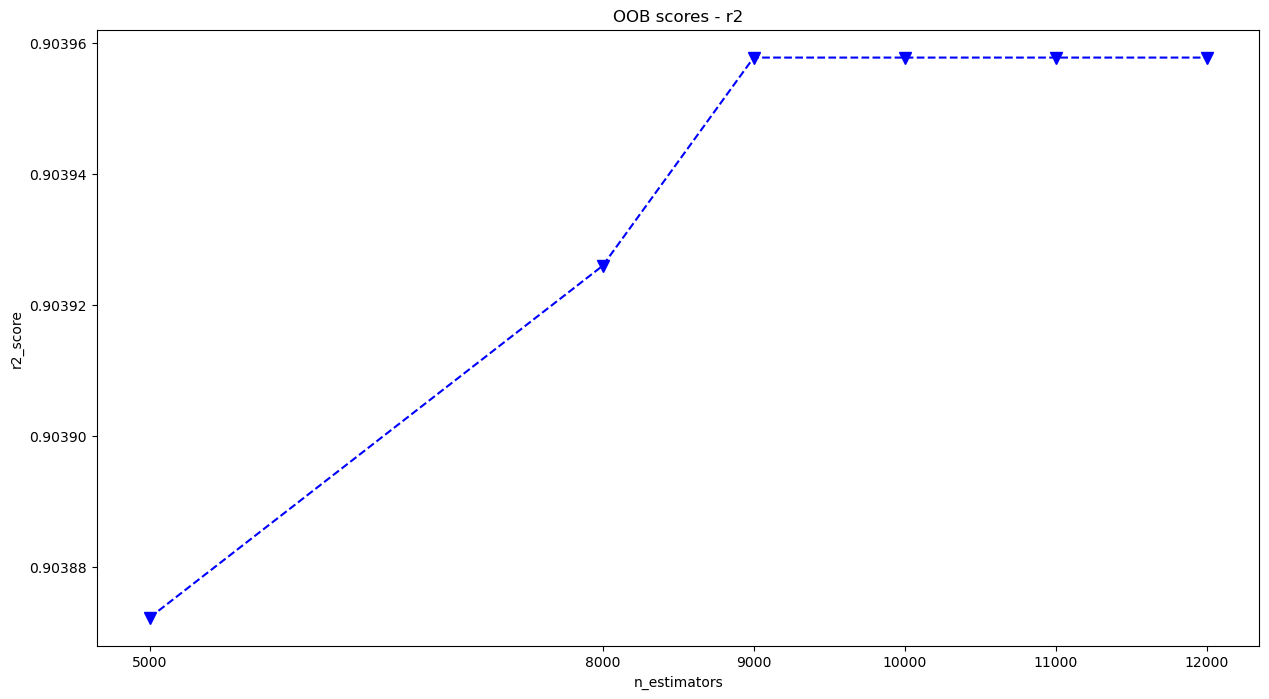

In [42]:
# Data
x_values = n_estimators_values


plt.figure(figsize=(15, 8))

# Create a line plot with customized properties
plt.plot(x_values, best_r2_values, color='blue', linestyle='--', marker='v', markersize=8)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.5f}'))

# Add labels and title
plt.xlabel('n_estimators')
plt.xticks(n_estimators_values)
plt.ylabel('r2_score')

plt.title('OOB scores - r2')


# Display the plot
plt.show()

We see r2 scores going up again from n_estimators == 5,000 to n_estimatoes == 90000. After 9,000 it seems to level off

In [43]:
#Create list of MAE scores

mae_oob_params = list(zip(mae_oob_list, params_list))

best_mae_values = []
best_mae_score = float('inf')

for value in n_estimators_values:
    for item in mae_oob_params:
        if item[1]['n_estimators'] == value:
            if item[0] < best_mae_score:
                best_mae_score = item[0]
    
    best_mae_values.append(best_mae_score)


print(best_mae_values)

[0.26870867787775987, 0.2685935388852467, 0.26849858549614425, 0.2684761545299406, 0.2684761545299406, 0.2684761545299406]


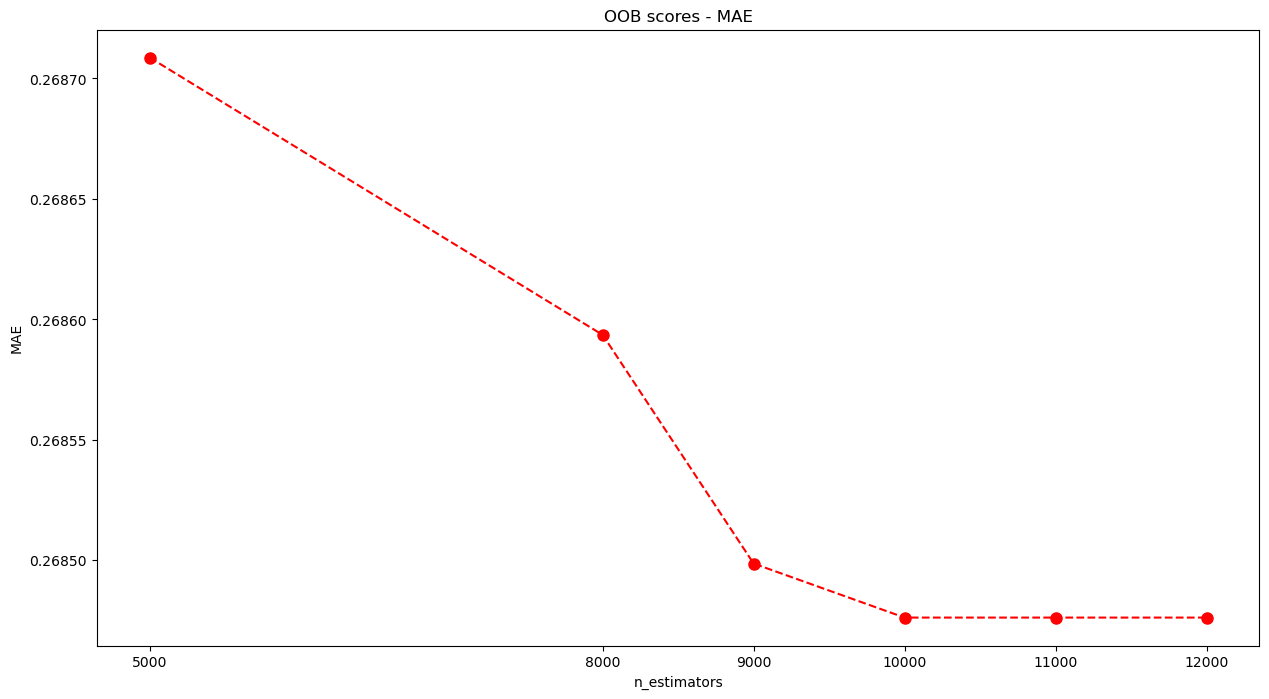

In [44]:
# Sample data
x_values = n_estimators_values
y_values = best_mae_values


plt.figure(figsize=(15, 8))

# Create a line plot with customized properties
plt.plot(x_values, y_values, color='red', linestyle='--', marker='o', markersize=8)
#plt.plot(x_values, y_values_2, color='blue', linestyle='--', marker='v', markersize=8)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.5f}')) 

# Add labels and title
plt.xlabel('n_estimators')
plt.xticks(n_estimators_values)

plt.ylabel('MAE')
plt.title('OOB scores - MAE')

# Display the plot
plt.show()

Again a similar result to r2 with this parameter search. However, here we see the MAE begining to level off after n_estimators == 10,000 instead of 9,000.
It appears that a good target for our final parameter optimazation would be a range of 9,000 to 11,000 for n_estimators. 